In [1]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
z = pd.read_csv("C:/Users/Tejal/Desktop/AS/AS - 13 KNN/Zoo.csv")

In [3]:
z

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
z.shape

(101, 18)

In [6]:
z.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
z.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [8]:
z['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [9]:
z

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
zoo = z.rename({'animal name':'animal_name'})


In [11]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
### KNN Model Building

In [13]:
x = zoo.iloc[:, 1:17]
y = zoo.iloc[:, -1]

In [14]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [16]:
model = KNeighborsClassifier(n_neighbors = 17)


In [17]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=17)

In [18]:
kfold = KFold(n_splits=12)
result = cross_val_score(model,x,y, cv=kfold)

In [19]:
result

array([1.        , 0.66666667, 0.66666667, 1.        , 0.66666667,
       0.75      , 0.875     , 0.75      , 0.625     , 0.625     ,
       0.5       , 0.875     ])

In [20]:
result.mean()

0.75

In [21]:
y_pred = model.predict(x)

In [22]:
y_pred

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 4, 5, 6, 2, 1, 4, 4, 2, 2,
       1, 2, 6, 1, 1, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 6, 1, 1, 1, 1, 6, 1, 6, 1, 1, 2, 2, 2, 2, 4, 4, 4, 1, 1, 1,
       4, 1, 1, 1, 1, 2, 6, 4, 4, 1, 4, 4, 2, 2, 4, 4, 4, 2, 1, 6, 4, 2,
       6, 1, 1, 1, 4, 1, 1, 2, 1, 6, 1, 4, 2], dtype=int64)

In [49]:
 ##yprediction = pd.DataFrame(y,y_pred)

In [50]:
##yprediction

,type
1,1
1,1
4,1
1,1
1,1
...,...
1,1
6,1
1,1
4,1


In [23]:
### Grid search 

In [24]:
n_neighbors = list(range(1,33))

In [25]:
parameters = {'n_neighbors':n_neighbors}

In [26]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model,param_grid = parameters)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [27]:
grid.best_score_

0.97

In [28]:
grid.best_params_

{'n_neighbors': 1}

In [29]:
### making model with best params 

In [30]:
model1 = KNeighborsClassifier(n_neighbors = 1)

In [31]:
model1.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [32]:
kfold = KFold(n_splits=90)
results = cross_val_score(model1, x, y, cv = kfold)

In [33]:
results.mean()

0.9777777777777777

In [34]:
kf_range = range(2,90)
kf_results = []

for k in  kf_range:
    kfold = KFold(n_splits=k)
    results = cross_val_score(model1, x, y, cv = kfold)
    kf_results.append(results.mean())


In [35]:
kf_range = range(2,90)
kf_results = []

for k in  kf_range:
    kfold = KFold(n_splits=k)
    results = cross_val_score(model, x, y, cv = kfold)
    kf_results.append(results.mean())


In [36]:
kf_results

[0.8109803921568628,
 0.8306595365418895,
 0.8511538461538461,
 0.8614285714285714,
 0.8713235294117646,
 0.8489795918367348,
 0.8677884615384616,
 0.8712121212121212,
 0.8800000000000001,
 0.8616161616161616,
 0.8576388888888888,
 0.8804945054945055,
 0.8813775510204082,
 0.8682539682539683,
 0.8690476190476191,
 0.8921568627450981,
 0.8851851851851852,
 0.8789473684210528,
 0.8800000000000001,
 0.8809523809523809,
 0.875,
 0.8760869565217391,
 0.88125,
 0.88,
 0.8846153846153846,
 0.8796296296296297,
 0.8749999999999999,
 0.8735632183908045,
 0.8749999999999999,
 0.8790322580645161,
 0.8828125,
 0.8787878787878788,
 0.892156862745098,
 0.8952380952380952,
 0.8888888888888888,
 0.8918918918918919,
 0.8859649122807017,
 0.8803418803418802,
 0.8791666666666667,
 0.8780487804878049,
 0.8809523809523809,
 0.87984496124031,
 0.8825757575757575,
 0.8851851851851851,
 0.8876811594202898,
 0.8900709219858155,
 0.8854166666666666,
 0.8877551020408163,
 0.89,
 0.8823529411764706,
 0.88461538461

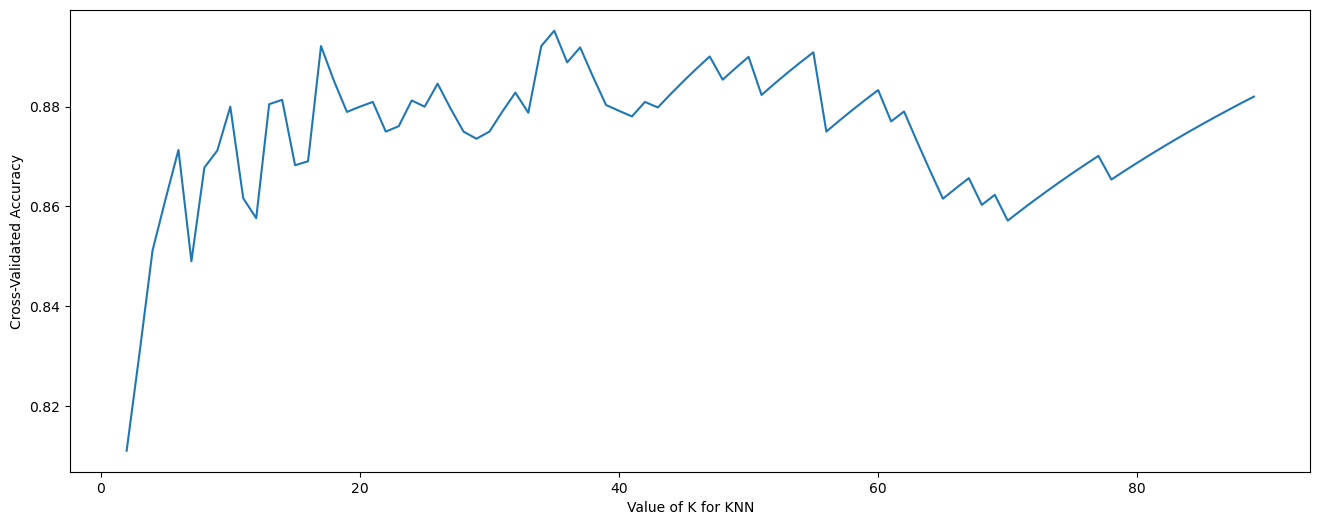

In [37]:
plt.figure(figsize=(16,6))
plt.plot(kf_range, kf_results)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [38]:
### In   above model I have taken value of k only 1 but i kept changing nsplit value for cross validation score  k fold value  

In [39]:
###  visualising the CV results 

In [40]:
k_range = range(1,57)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv = 4)
    k_scores.append(scores.mean())

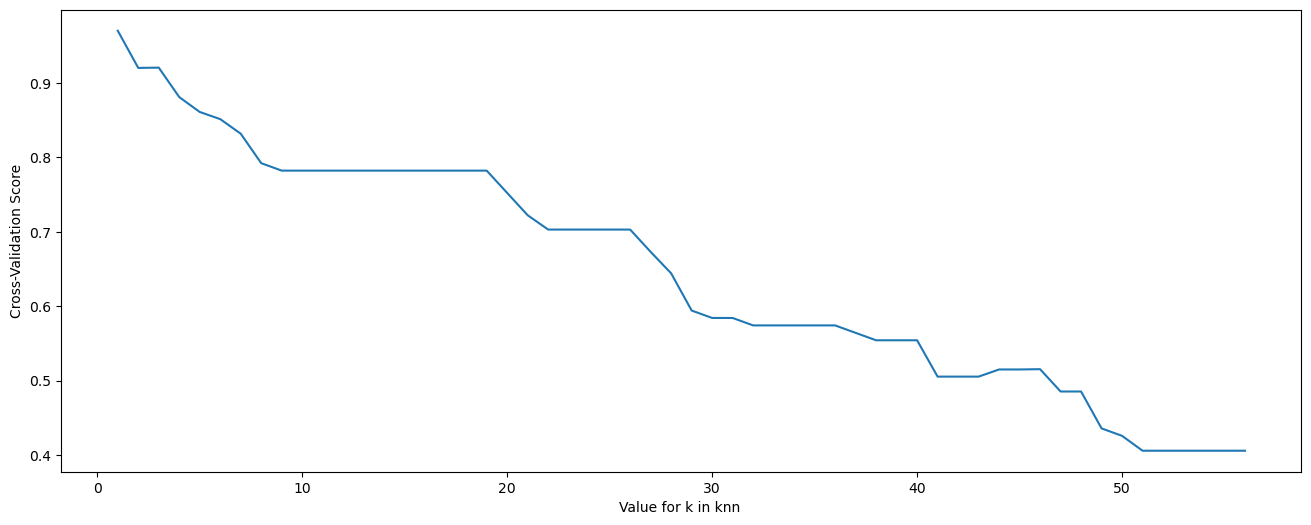

In [41]:
plt.figure(figsize = (16,6))
plt.plot(k_range,k_scores)
plt.xlabel('Value for k in knn ')
plt.ylabel('Cross-Validation Score')
plt.show()

In [ ]:
## Here as per the graph the higest accuracy is when k = 1 ..

In [54]:
zoo_accuracy = pd.DataFrame({'Value of k':range(1,57),
                              'Accuracy' : k_scores})

In [55]:
zoo_accuracy

,Value of k,Accuracy
0,1,0.970385
1,2,0.920385
2,3,0.920769
3,4,0.881154
4,5,0.861154
5,6,0.851538
6,7,0.831923
7,8,0.792308
8,9,0.782308
9,10,0.782308


In [56]:
### here it clearly shows that particulary in this dataset accuracy of the model is higest when k =1